# FIFA

### A. Histogram dan Boxplot

In [2]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as st

fifa = pd.read_csv('dataset_fifa.csv')

fifa.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0CFA1430>]],
      dtype=object)

Memasukkan data pada file "dataset_fifa.csv" kedalam variabel fifa, dan membuat histogram dari data tersebut.

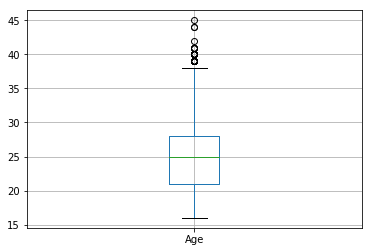

In [3]:
fifa.boxplot()

Membuat boxplot dari fifa

### B. Atribut Dasar

In [4]:
desc = fifa.describe().drop(['count','25%','50%','75%'])

desc.loc['median'] = fifa.median().at['Age']
desc.loc['variance'] = fifa.var().at['Age']
desc.loc['kurtosis'] = fifa.kurtosis().at['Age']
desc.loc['skewness'] = fifa.skew().at['Age']

desc

Age
mean      25.122206
std        4.669943
min       16.000000
max       45.000000
median    25.000000
variance  21.808365
kurtosis  -0.459514
skewness   0.391764

Nilai kuartil, dan jumlah data tidak dibutuhkan, oleh karena itu atribut tersebut tidak ditampilkan (didrop).

Nilai median, variance, kurtosis, dan skewness ditambahkan ke dalam tabel desc.

In [5]:
fifa.mode().drop(['Name'],axis=1).rename({0 : 'mode'})

Age Nationality
mode   21     England

Nilai modus yang ditampilkan ada 2, yaitu modus Age dan modus Nationality.

Nilai modus Name tidak ditampilkan karena tidak masuk akal untuk mencari modus dari nama.

### C. Penentuan Distribusi Peluang

Penentuan fungsi distribusi peluang dilakukan dengan cara mencocokan berbagai kemungkinan distribusi peluang, salah satunya dengan mencocokkan bentuk histogram, setelah melakukan berbagai pencocokkan, didapatkan sebuah distribusi peluang yang cocok, yaitu:

##### Beta, dengan alpha = 2.485160112120321 dan beta = 5.358773760119705

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0AB07E10>]],
      dtype=object)

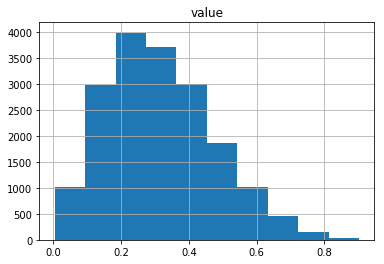

In [9]:
randombeta = pd.DataFrame(np.random.beta(2.485160112120321, 5.358773760119705, size = fifa.Name.count()), columns = ['value'])
randombeta.hist()

##### Gambar histogram distribusi beta dari data yang dibuat secara acak dengan jumlah data sebanyak data fifa, dengan parameter yang telah disebutkan sebelumnya, memiliki kemiripan dengan histogram fifa

Perbedaannya terdapat pada sumbu x yang harus di sesuaikan skalanya dengan umur sesungguhnya, mengikuti nilai min dan max, 0 pada histogram diatas berkorespondensi dengan umur 16, sedangkan 1 dengan umur 45

### D. Jawaban Soal Terkait

##### Soal :

- Jika terdapat 1000 pemain bola baru yang ditambahkan oleh Tsubasa, tentukan ekspektasi jumlah pemain bola yang:
    * Berumur kurang dari 22 tahun
    * Berumur lebih dari 40 tahun

In [3]:
x = (22 - 16) / (45 - 16) # convert ke skala beta

st.beta.cdf(x, 2.485160112120321, 5.358773760119705)*1000

273.6718348575269

Jawaban dari point pertama adalah:

##### 273.6718348575269

In [4]:
x = (40 - 16) / (45 - 16) # convert ke skala beta

(1 - st.beta.cdf(x, 2.485160112120321, 5.358773760119705))*1000

0.8039403967335934

Jawaban dari point ke-dua adalah:

#### 0.8039403967335934